In [1]:
import pandas as pd

data = pd.read_csv("fitness_user_data.csv")
data

,user_id,exercise_time,calories_burned,weight,exercise_type,exercise_date
0,1,45.0,400.0,70.0,Running,2023-01-15
1,2,60.0,500.0,75.0,Weight Training,2023-02-10
2,3,30.0,200.0,68.0,Yoga,2023-03-05
3,4,90.0,NaN,80.0,Running,2023-03-20
4,5,NaN,600.0,72.0,Weight Training,2023-04-18
5,6,120.0,800.0,85.0,Yoga,2023-04-25
6,7,150.0,1000.0,90.0,Running,2023-05-05
7,8,180.0,1200.0,NaN,Weight Training,2023-06-02
8,9,210.0,1500.0,100.0,Yoga,2023-07-10
9,10,60.0,400.0,73.0,Running,2023-07-15


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          15 non-null     int64  
 1   exercise_time    14 non-null     float64
 2   calories_burned  14 non-null     float64
 3   weight           14 non-null     float64
 4   exercise_type    15 non-null     object 
 5   exercise_date    15 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 852.0+ bytes


In [5]:
data.head(5)

,user_id,exercise_time,calories_burned,weight,exercise_type,exercise_date
0,1,45.0,400.0,70.0,Running,2023-01-15
1,2,60.0,500.0,75.0,Weight Training,2023-02-10
2,3,30.0,200.0,68.0,Yoga,2023-03-05
3,4,90.0,NaN,80.0,Running,2023-03-20
4,5,NaN,600.0,72.0,Weight Training,2023-04-18


In [7]:
data.isnull().sum()

user_id            0
exercise_time      1
calories_burned    1
weight             1
exercise_type      0
exercise_date      0
dtype: int64

# 결측값 처리

In [44]:
# exercise_time (운동 시간, 분)의 결측값은 평균값으로 채우기
data['exercise_time'].fillna(data['exercise_time'].mean())

# calories_burned (소모 칼로리)의 결측값은 0으로 채우기
data['calories_burned'].fillna(0)

# weight (몸무게, kg)의 결측값은 최빈값(가장 많이 등장한 값)으로 채우기
data['weight'].fillna(data['weight'].mode())

data

,user_id,exercise_time,calories_burned,weight,exercise_type,exercise_date
0,1,45.000000,400.0,70.0,Running,2023-01-15
1,2,60.000000,500.0,75.0,Weight Training,2023-02-10
2,3,30.000000,200.0,68.0,Yoga,2023-03-05
3,4,90.000000,0.0,80.0,Running,2023-03-20
4,5,82.857143,600.0,72.0,Weight Training,2023-04-18
5,6,120.000000,800.0,85.0,Yoga,2023-04-25
6,7,150.000000,1000.0,90.0,Running,2023-05-05
7,8,180.000000,1200.0,75.0,Weight Training,2023-06-02
8,9,210.000000,1500.0,100.0,Yoga,2023-07-10
9,10,60.000000,400.0,73.0,Running,2023-07-15


# 이상치 처리

In [51]:
# 90% 백분위 구하기
q90 = data['exercise_time'].quantile(0.90)

# 180 이상인 값들을 90% 백분위로 대체
data.loc[data['exercise_time'] >=180, 'exercise_time'] = q90

data

,user_id,exercise_time,calories_burned,weight,exercise_type,exercise_date
0,1,45.000000,400.0,70.0,Running,2023-01-15
1,2,60.000000,500.0,75.0,Weight Training,2023-02-10
2,3,30.000000,200.0,68.0,Yoga,2023-03-05
3,4,90.000000,0.0,80.0,Running,2023-03-20
4,5,82.857143,600.0,72.0,Weight Training,2023-04-18
5,6,120.000000,800.0,85.0,Yoga,2023-04-25
6,7,150.000000,1000.0,90.0,Running,2023-05-05
7,8,168.000000,1200.0,75.0,Weight Training,2023-06-02
8,9,168.000000,1500.0,100.0,Yoga,2023-07-10
9,10,60.000000,400.0,73.0,Running,2023-07-15


In [55]:
# 75% 백분위 구하기
q75 = data['calories_burned'].quantile(0.75)

# 1500이상인 값을 75% 백분위로 대체
data.loc[data['calories_burned'] >= 1500, 'calories_burned'] = q75

data

,user_id,exercise_time,calories_burned,weight,exercise_type,exercise_date
0,1,45.000000,400.0,70.0,Running,2023-01-15
1,2,60.000000,500.0,75.0,Weight Training,2023-02-10
2,3,30.000000,200.0,68.0,Yoga,2023-03-05
3,4,90.000000,0.0,80.0,Running,2023-03-20
4,5,82.857143,600.0,72.0,Weight Training,2023-04-18
5,6,120.000000,800.0,85.0,Yoga,2023-04-25
6,7,150.000000,1000.0,90.0,Running,2023-05-05
7,8,168.000000,1200.0,75.0,Weight Training,2023-06-02
8,9,168.000000,700.0,100.0,Yoga,2023-07-10
9,10,60.000000,400.0,73.0,Running,2023-07-15


# 날짜 처리

In [73]:
from datetime import datetime

data['exercise_date'] = data['exercise_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          15 non-null     int64         
 1   exercise_time    15 non-null     float64       
 2   calories_burned  15 non-null     float64       
 3   weight           15 non-null     float64       
 4   exercise_type    15 non-null     object        
 5   exercise_date    15 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 852.0+ bytes


In [81]:
data['exercise_day_of_week'] = data['exercise_date'].dt.day_name()

data['exercise_day_of_week'] = data['exercise_date'].dt.dayofweek
# 0 = 월요일, 6 = 일요일

day_map = {
    0: 'Monday',
    1: 'Tuesday', 
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
}

data['exercise_day_of_week'] = data['exercise_date'].dt.dayofweek.map(day_map)

data

,user_id,exercise_time,calories_burned,weight,exercise_type,exercise_date,exercise_day_of_week
0,1,45.000000,400.0,70.0,Running,2023-01-15,Sunday
1,2,60.000000,500.0,75.0,Weight Training,2023-02-10,Friday
2,3,30.000000,200.0,68.0,Yoga,2023-03-05,Sunday
3,4,90.000000,0.0,80.0,Running,2023-03-20,Monday
4,5,82.857143,600.0,72.0,Weight Training,2023-04-18,Tuesday
5,6,120.000000,800.0,85.0,Yoga,2023-04-25,Tuesday
6,7,150.000000,1000.0,90.0,Running,2023-05-05,Friday
7,8,168.000000,1200.0,75.0,Weight Training,2023-06-02,Friday
8,9,168.000000,700.0,100.0,Yoga,2023-07-10,Monday
9,10,60.000000,400.0,73.0,Running,2023-07-15,Saturday


# 데이터 시각화

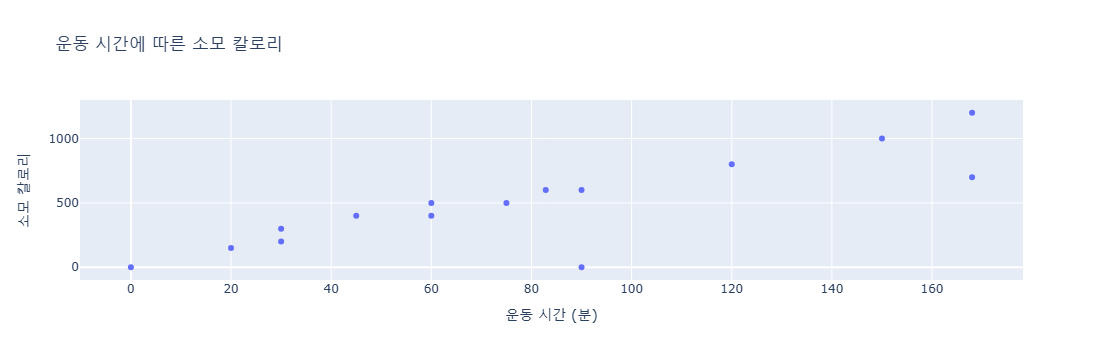

In [89]:
import plotly.express as px

# 운동 시간 vs 소모 칼로리 산점도
fig1 = px.scatter(data, 
                  x='exercise_time', 
                  y='calories_burned', 
                  title='운동 시간에 따른 소모 칼로리',
                  labels={'exercise_time': '운동 시간 (분)', 
                          'calories_burned': '소모 칼로리'},)
fig1.show()

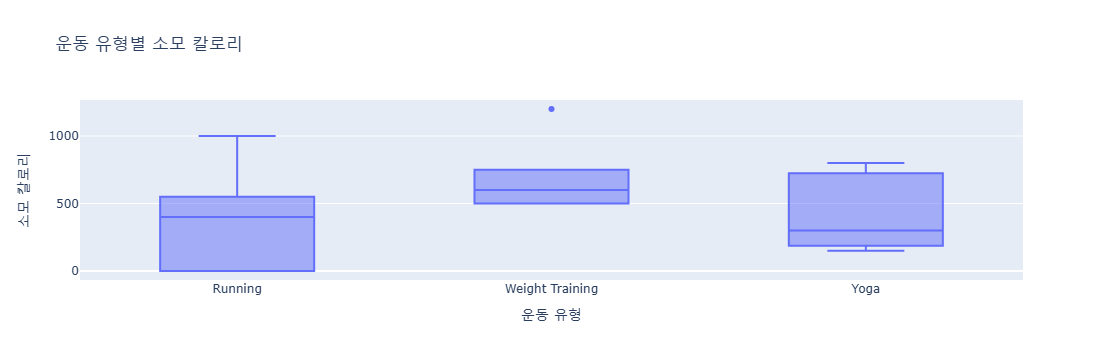

In [95]:
# 운동 유형 vs 소모 칼로리 산점도
fig2 = px.box(data, 
               x='exercise_type', 
               y='calories_burned', 
               title='운동 유형별 소모 칼로리',
               labels={'exercise_type': '운동 유형', 
                       'calories_burned': '소모 칼로리'})
fig2.show()

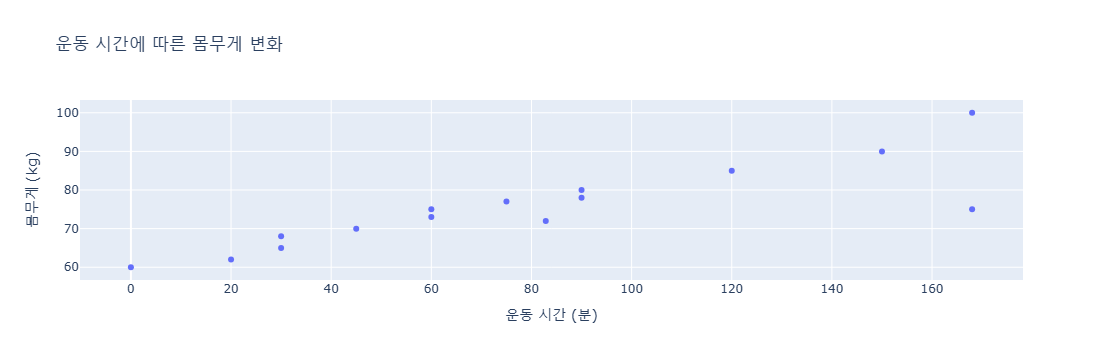

In [99]:
# 운동 시간 vs 몸무게 산점도
fig3 = px.scatter(data, 
                  x='exercise_time', 
                  y='weight', 
                  title='운동 시간에 따른 몸무게 변화',
                  labels={'exercise_time': '운동 시간 (분)', 
                          'weight': '몸무게 (kg)'},)
fig3.show()

In [103]:
# 상관관계 분석
correlation_time_calories = data['exercise_time'].corr(data['calories_burned'])
correlation_time_weight = data['exercise_time'].corr(data['weight'])

print("운동 시간과 소모 칼로리 상관관계:", correlation_time_calories)
print("운동 시간과 몸무게 상관관계:", correlation_time_weight)

# 운동 유형별 평균 소모 칼로리
calories_by_type = data.groupby('exercise_type')['calories_burned'].mean()
print("\n운동 유형별 평균 소모 칼로리:\n", calories_by_type)

운동 시간과 소모 칼로리 상관관계: 0.8377625779450609
운동 시간과 몸무게 상관관계: 0.8620300187724079

운동 유형별 평균 소모 칼로리:
 exercise_type
Running            360.0
Weight Training    680.0
Yoga               430.0
Name: calories_burned, dtype: float64
